In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

df = pd.read_csv('t-shirts.csv')
df.head()

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [10]:
size_mapping = {"XS": 0, "S": 1, "M": 2, "L": 3, "XL": 4, "XXL": 5, "3XL": 6}
sleeves_mapping = {"short": 0, "long": 1}

df['size'] = df['size'].map(size_mapping)
df['sleeves'] = df['sleeves'].map(sleeves_mapping)

df.head()

,size,material,color,sleeves,demand
0,1,nylon,white,1,medium
1,4,polyester,cream,0,high
2,1,silk,blue,0,medium
3,2,cotton,black,0,medium
4,4,polyester,orange,1,medium


In [11]:
df = pd.get_dummies(df, columns=["material", "color"])

df.head()

,size,sleeves,demand,material_cotton,material_linen,material_nylon,material_polyester,material_silk,color_black,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow
0,1,1,medium,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,4,0,high,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2,1,0,medium,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
3,2,0,medium,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,4,1,medium,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [12]:
X = df.drop("demand", axis=1)
y = df["demand"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_discretized = kbins.fit_transform(X_train)
X_val_discretized = kbins.transform(X_val)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

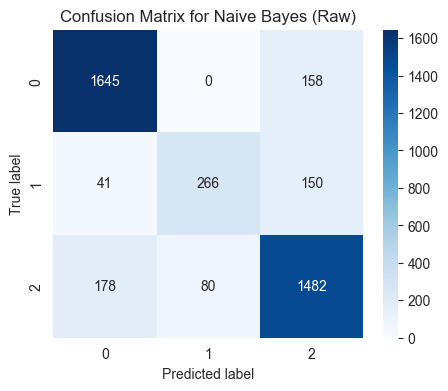

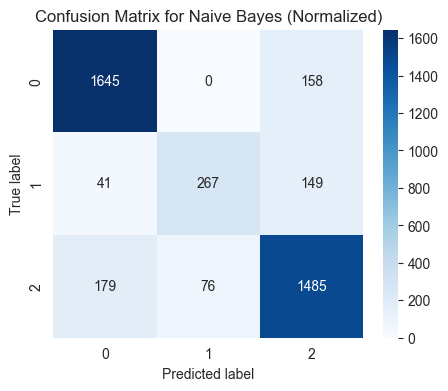

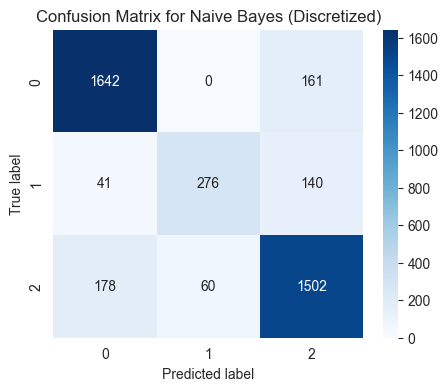

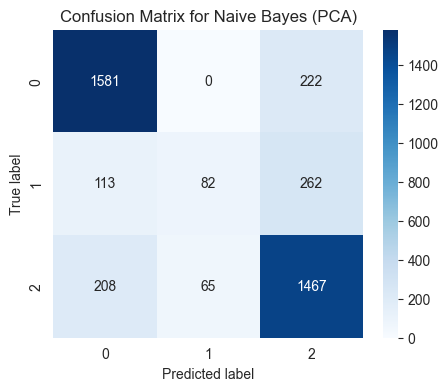

         Model       Method  Accuracy    Recall  Precision  F1-score
0  Naive Bayes          Raw   0.84825  0.782050   0.826410  0.799789
1  Naive Bayes   Normalized   0.84925  0.783354   0.829715  0.801777
2  Naive Bayes  Discretized   0.85500  0.792621   0.845602  0.813416
3  Naive Bayes          PCA   0.78250  0.633135   0.713659  0.639957


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_sets = {
    'Raw': (X_train, X_val),
    'Normalized': (X_train_normalized, X_val_normalized),
    'Discretized': (X_train_discretized, X_val_discretized),
    'PCA': (X_train_pca, X_val_pca)
}

results = []

nb = LogisticRegression(max_iter=1000)

for name, (X_train_set, X_val_set) in data_sets.items():
    nb.fit(X_train_set, y_train)
    y_pred_nb = nb.predict(X_val_set)
    accuracy_nb = accuracy_score(y_val, y_pred_nb)
    recall_nb = recall_score(y_val, y_pred_nb, average='macro')
    precision_nb = precision_score(y_val, y_pred_nb, average='macro')
    f1_nb = f1_score(y_val, y_pred_nb, average='macro')
    results.append({'Model': 'Naive Bayes', 'Method': name, 'Accuracy': accuracy_nb, 'Recall': recall_nb, 'Precision': precision_nb, 'F1-score': f1_nb})
    cm = confusion_matrix(y_val, y_pred_nb)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Naive Bayes ({name})')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)